# Введение в анализ данных
## Домашнее задание 3. 


**Правила:**

* Дедлайн **17 мая 23:59**. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить на почту `mipt.stats@yandex.ru`, указав тему письма `"[номер группы] Фамилия Имя - Задание 3"`. Квадратные скобки обязательны.
* Прислать нужно ноутбук и его pdf-версию (без архивов). Названия файлов должны быть такими: `3.N.ipynb` и `3.N.pdf`, где `N` -- ваш номер из таблицы с оценками. *pdf-версию можно сделать с помощью Ctrl+P. Пожалуйста, посмотрите ее полностью перед отправкой. Если что-то существенное не напечатается в pdf, то баллы могут быть снижены.*
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код при проверке запускаться не будет.

**Баллы за задание:**

Легкая часть (достаточно на "хор"):

* Задача 1 -- 3 балла

Сложная часть (необходимо на "отл"):

* Задача 2 -- 2 балла
* Задача 3 -- 10 баллов
* Задача 4 -- 4 балла

Баллы за разные части суммируются отдельно, нормируются впоследствии также отдельно. Иначе говоря, 1 балл за легкую часть может быть не равен 1 баллу за сложную часть.

## Легкая часть

Перед выполнением этой части настоятельно рекомендуется посмотреть ноутбук с лекции про закон больших чисел.

### Задача 1.

В этой задаче нужно визуализировать *центральную предельную теорему*.

**a).** Пусть $\xi_1, ..., \xi_n$ --- независимые случайные величины из распределения $Exp(\lambda)$. Согласно центральной предельной теореме выполнена сходимость $$Z_n = \frac{X_n - \mathsf{E}X_n}{\sqrt{\mathsf{D}X_n}} \stackrel{d}{\longrightarrow} \mathcal{N}(0, 1),$$ где $X_n = \sum\limits_{i=1}^n \xi_i$. Вам нужно убедиться в этом, сгенерировав множество наборов случайных величин и посчитав по каждому из наборов величину $Z_n$ в зависимости от размера набора. 

Сгенерируйте 500 наборов случайных величин $\xi_1^j, ..., \xi_{300}^j$ из распределения $Exp(1)$. По каждому из них посчитайте сумму $X_{jn} = \sum\limits_{i=1}^n \xi_i^j$ для $1 \leqslant n \leqslant 300$, то есть сумма первых $n$ величин $j$-го набора. Для этого среднего посчитайте величину $$Z_{jn} = \frac{X_{jn} - \mathsf{E}X_{jn}}{\sqrt{\mathsf{D}X_{jn}}}.$$


In [1]:
import numpy as np
import scipy.stats as sps
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import animation as animation

sns.set(font_scale=1.6, palette='summer')

In [2]:
size = 300
samples_count = 500
distribution = sps.expon(scale=1)
sample = distribution.rvs(size=(samples_count, size))
sample = sample.cumsum(axis=1)
cum_mean = np.full(shape=(samples_count, size), 
                   fill_value=distribution.mean()).cumsum(axis=1)
cum_std = np.sqrt(np.full(shape=(samples_count, size), 
                          fill_value=distribution.var()).cumsum(axis=1))
sample = (sample - cum_mean) / cum_std

Для каждого $j$ нанесите на один график зависимость $Z_{jn}$ от $n$. Каждая кривая должна быть нарисована *одним цветом* с прозрачностью `alpha=0.05`. Сходятся ли значения $Z_{jn}$ к какой-либо константе?

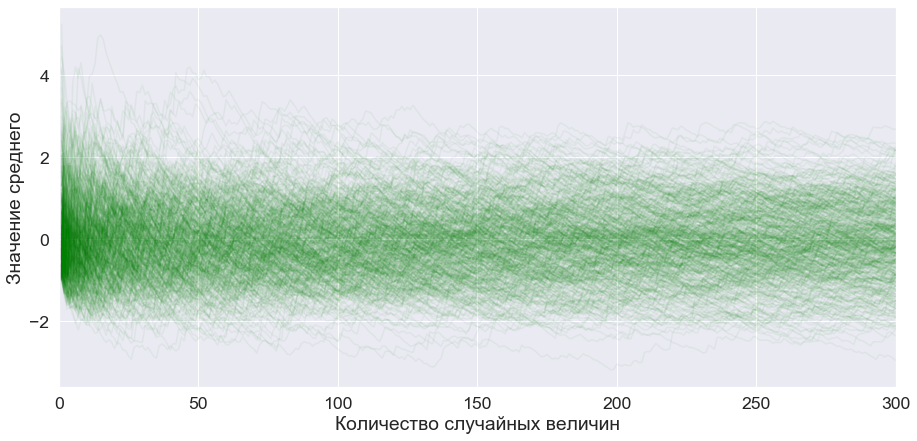

In [3]:
plt.figure(figsize=(15, 7))
for i in range(samples_count):
    plt.plot(np.arange(size) + 1, sample[i], color='green', alpha=0.05)
plt.xlabel('Количество случайных величин')
plt.ylabel('Значение среднего')
plt.xlim((0, size))
plt.show()

На нашем графике явная сходимость к константе не видна. Какие-то "попытки" сходимости к 0 видны только до 50 случайных величин.

Для $n=300$ по набору случайных величин $Z_{1,300}, ..., Z_{500,300}$ постройте гистограмму. Похожа ли она на плотность распределения $\mathcal{N}(0, 1)$ (ее тоже постройте на том же графике)? Не забудьте сделать легенду.

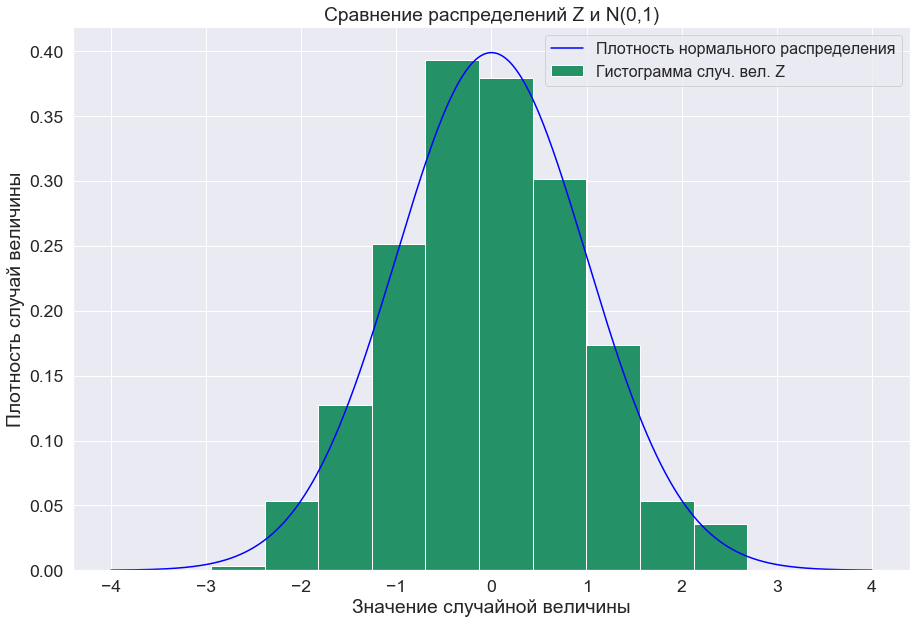

In [4]:
plt.figure(figsize=(15, 10))
plt.hist(sample[:,-1],
         bins=10,
         density=True,
         label='Гистограмма случ. вел. Z'
        )
grid = np.linspace(-4, 4, 10000)
plt.plot(
    grid,
    sps.norm.pdf(grid),
    label='Плотность нормального распределения',
    color='blue'
)
plt.legend(loc=1, fontsize=16)
plt.xlabel('Значение случайной величины')
plt.ylabel('Плотность случай величины')
plt.title('Сравнение распределений Z и N(0,1)')
plt.show()

Как видим, плотность распределения $Z$ сильно похожа на $\mathcal{N}(0, 1)$. 

**b).** Выполните те же действия для распределений $U(0, 1)$ и $Pois(1)$.

Рассмотрим распределение $U(0, 1)$:

In [5]:
size = 300
samples_count = 500
distribution = sps.uniform(loc=0, scale=1)
sample = distribution.rvs(size=(samples_count, size))
sample = sample.cumsum(axis=1)
cum_mean = np.full(shape=(samples_count, size), 
                   fill_value=distribution.mean()).cumsum(axis=1)
cum_std = np.sqrt(np.full(shape=(samples_count, size), 
                          fill_value=distribution.var()).cumsum(axis=1))
sample = (sample - cum_mean) / cum_std

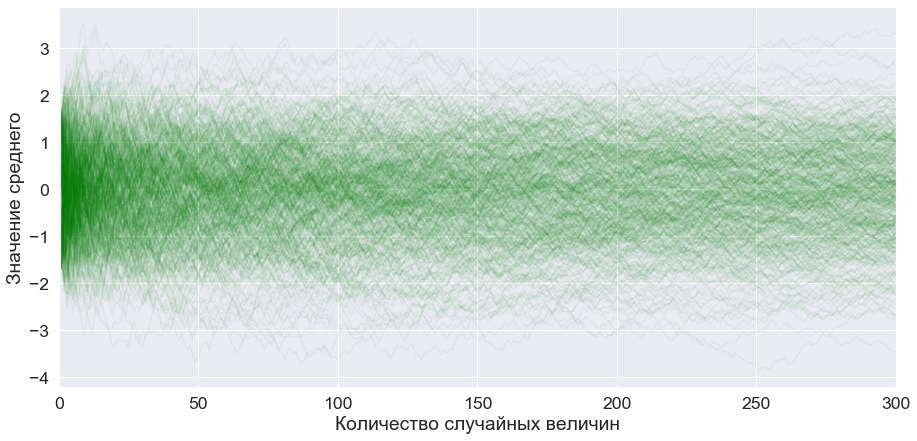

In [6]:
plt.figure(figsize=(15, 7))
for i in range(samples_count):
    plt.plot(np.arange(size) + 1, sample[i], color='green', alpha=0.05)
plt.xlabel('Количество случайных величин')
plt.ylabel('Значение среднего')
plt.xlim((0, size))
plt.show()

Проглядывается сходимость к 0 до 100 случайных величин. 

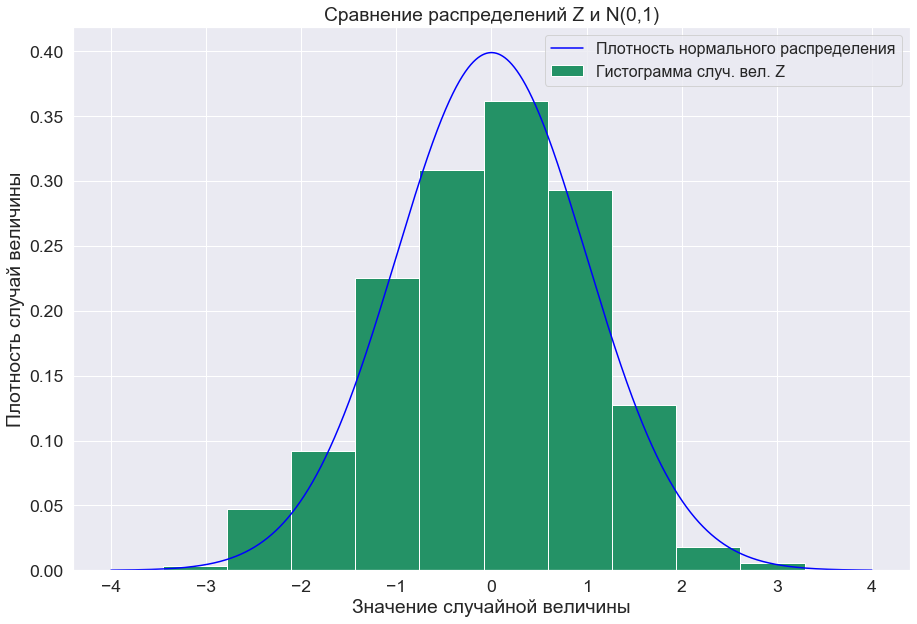

In [7]:
plt.figure(figsize=(15, 10))
plt.hist(sample[:,-1],
         bins=10,
         density=True,
         label='Гистограмма случ. вел. Z'
        )
grid = np.linspace(-4, 4, 10000)
plt.plot(
    grid,
    sps.norm.pdf(grid),
    label='Плотность нормального распределения',
    color='blue'
)
plt.legend(loc=1, fontsize=16)
plt.xlabel('Значение случайной величины')
plt.ylabel('Плотность случай величины')
plt.title('Сравнение распределений Z и N(0,1)')
plt.show()

Графики снова очень похожи

Рассмотрим распределение $Pois(1)$:

In [8]:
size = 300
samples_count = 500
distribution = sps.poisson(1)
sample = distribution.rvs(size=(samples_count, size))
sample = sample.cumsum(axis=1)
cum_mean = np.full(shape=(samples_count, size), 
                   fill_value=distribution.mean()).cumsum(axis=1)
cum_std = np.sqrt(np.full(shape=(samples_count, size), 
                          fill_value=distribution.var()).cumsum(axis=1))
sample = (sample - cum_mean) / cum_std

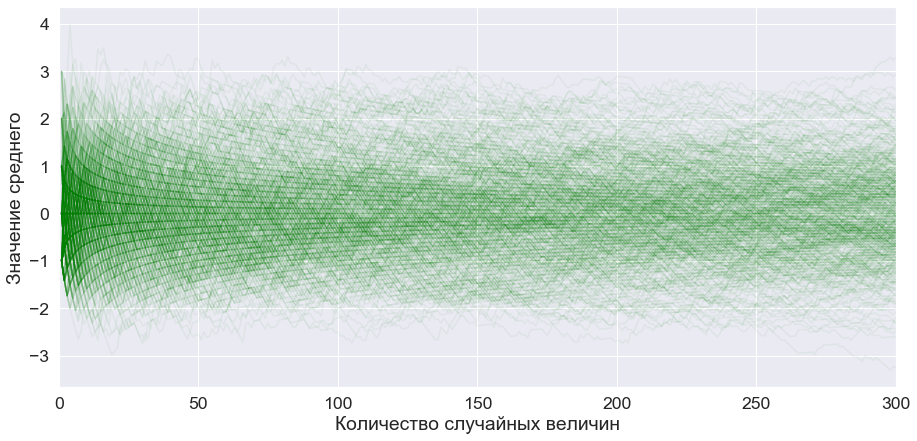

In [9]:
plt.figure(figsize=(15, 7))
for i in range(samples_count):
    plt.plot(np.arange(size) + 1, sample[i], color='green', alpha=0.05)
plt.xlabel('Количество случайных величин')
plt.ylabel('Значение среднего')
plt.xlim((0, size))
plt.show()

По линиям между 0 и 50 случ.вел. видна сходимость к 0.

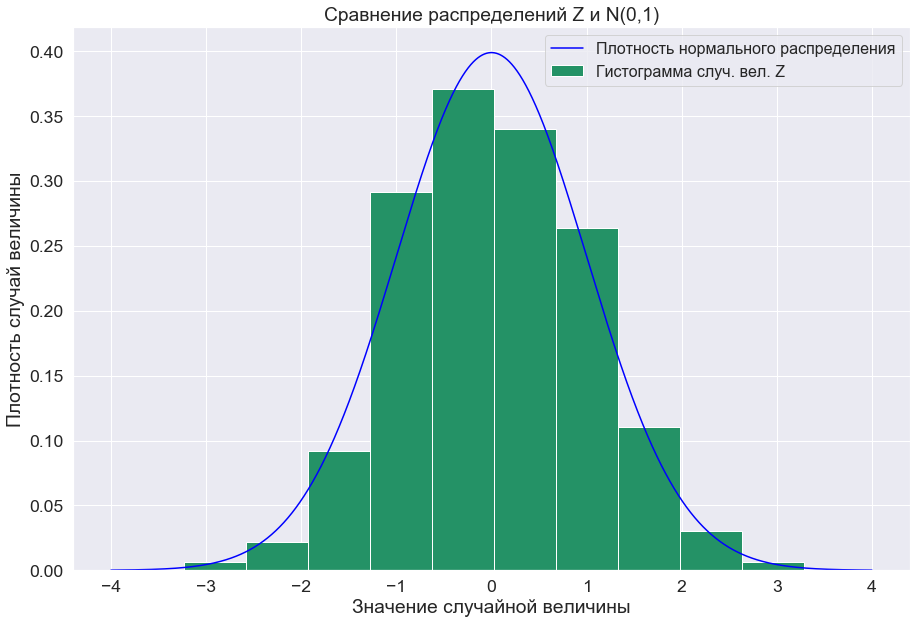

In [10]:
plt.figure(figsize=(15, 10))
plt.hist(sample[:,-1],
         bins=10,
         density=True,
         label='Гистограмма случ. вел. Z'
        )
grid = np.linspace(-4, 4, 10000)
plt.plot(
    grid,
    sps.norm.pdf(grid),
    label='Плотность нормального распределения',
    color='blue'
)
plt.legend(loc=1, fontsize=16)
plt.xlabel('Значение случайной величины')
plt.ylabel('Плотность случай величины')
plt.title('Сравнение распределений Z и N(0,1)')
plt.show()

Графики схожи.

Сделайте вывод о смысле центральной предельной теоремы. Подтверждают ли сделанные эксперименты теоретические свойства?

Смысл ЦПТ заключается в том, что, проводя множество экспериментов и зная матожидание с дисперсией, мы можем расчитывать какую-нибудь вероятность, пользуясь нормальным распределением. Наши эксперименты полностью подтверждают теоретические свойства, так как при больших количествах экспериментов мы видим по графикам схожесть нужных нам плотностей.

## Сложная часть

### Задача 2.

В этой задаче нужно визуализировать *закон повторого логарифма*.

*a).* Пусть $\xi_1, ..., \xi_n$ --- независимые случайные величины из равномерного распределения на $\{-1, 1\}$. Согласно закону повторного логарифма траектория суммы $S_n = \xi_1 + ... + \xi_n$ при увеличении $n$ с вероятностью 1 бесконечное число раз пересекает границу $\pm (1-\varepsilon)\sqrt{2n\log\log n}, \varepsilon>0$, и лишь конечное число раз пересекает границу $\pm (1+\varepsilon)\sqrt{2n\log\log n}, \varepsilon>0$. Вам нужно убедиться в этом, сгенерировав множество наборов случайных величин и посчитав по каждому из наборов сумму в зависимости от размера набора.

Сгенерируйте 500 наборов случайных величин $\xi_1^j, ..., \xi_{300}^j$ из распределения $Bern(1/2)$. По каждому из них посчитайте среднее $S_{jn} = \sum\limits_{i=1}^n \xi_i^j$ для $1 \leqslant n \leqslant 300$, то есть сумму по первым $n$ величинам $j$-го набора.

In [11]:
size = 300
samples_count = 500
distribution = sps.bernoulli(0.5)
sample = distribution.rvs(size=(samples_count, size))*2 - 1
sample = sample.cumsum(axis=1)

Для каждого $j$ нанесите на один график зависимость $S_{jn}$ от $n$. Каждая кривая должна быть нарисована *одним цветом* с прозрачностью `alpha=0.05`.

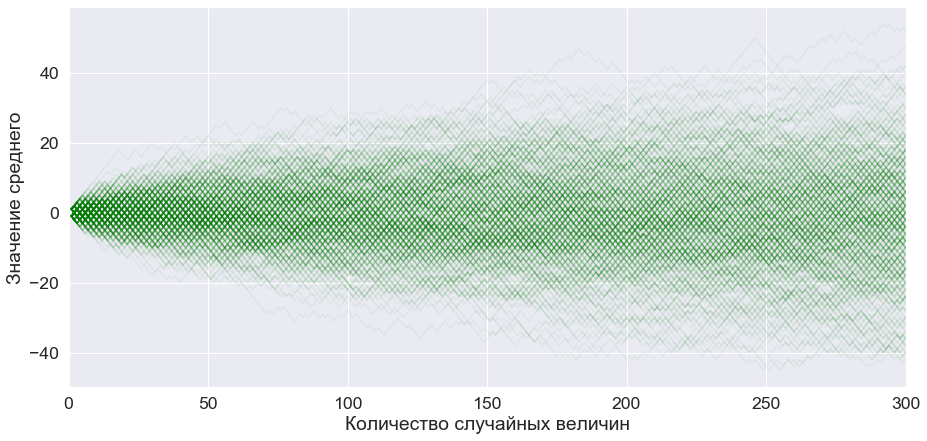

In [12]:
plt.figure(figsize=(15, 7))
for i in range(samples_count):
    plt.plot(np.arange(size) + 1, sample[i], color='green', alpha=0.05)
plt.xlabel('Количество случайных величин')
plt.ylabel('Значение среднего')
plt.xlim((0, size))
plt.show()

Для трех различных $n$ по набору случайных величин $S_{1,n}, ..., S_{500,n}$ постройте графих доли тех величин, которые выходят за порог $\pm с\sqrt{2n\log\log n}$ при изменении $c$ от 0.5 до 1.5. Графики стройте в строчку с помощью `plt.subplot`.

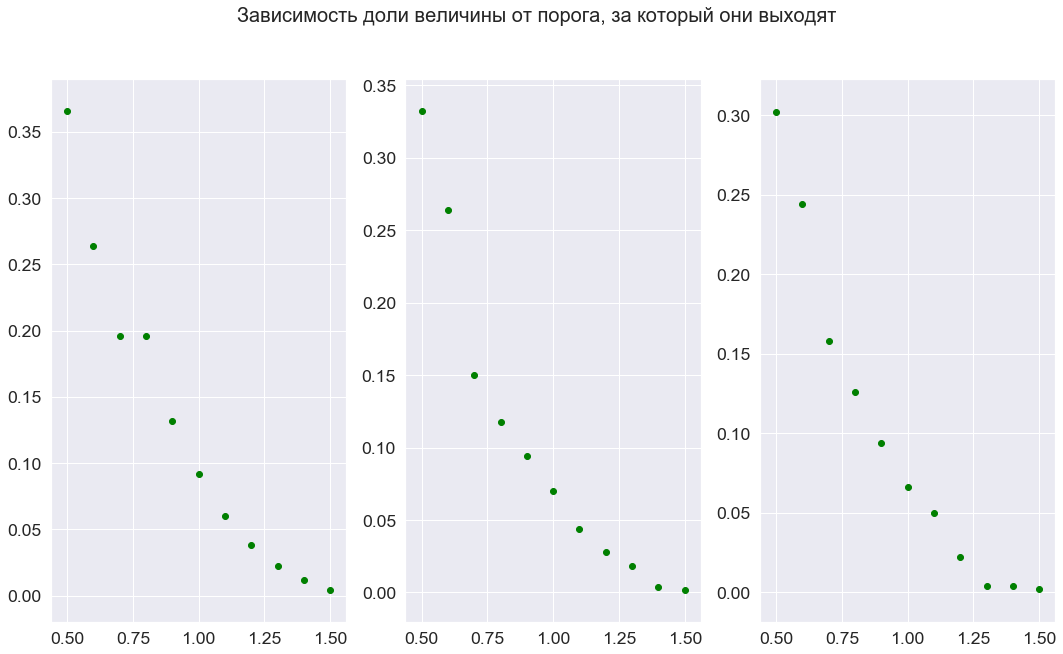

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(18, 10))
fig.suptitle('Зависимость доли величины от порога, за который они выходят',
             fontsize=20)

numbers_rv = (100, 200, 300)

for ax, number_rv in zip(axes.flat, numbers_rv):
    c = np.arange(0.5, 1.6, 0.1)
    temp_sample = sample[:,number_rv - 1].copy()
    threshold = c*np.sqrt(2*number_rv*np.log(np.log(number_rv)))
    proportion = np.empty((0,))
    for x in threshold:
        x = ((temp_sample > x) | (temp_sample < -x)).sum() / \
            temp_sample.size
        proportion = np.append(proportion, x)
    ax.scatter(c,
               proportion,
               color='green')

plt.show()

Сделайте вывод о смысле закона повторного логарифма. Подтверждают ли сделанные эксперименты теоретические свойства?

С увеличением $n$ незаметно, что доли стремятся к $0$ или к $1$. Графики выглядят схоже. Возможно, нужно побольше значние $n$. Поэтому подтвердить теор.свойства сложно.

---
### Задача 3.

В этой задаче нужно проявить и визуализировать свое *творчество*.

Общий принцип:
* Придумать какую-либо цель исследования, поставить вопрос или гипотезы
* Собрать необходимый набор данных "руками" или с помощью кода.
* Сделать простой анализ полученного датасета в этом ноутбуке.
* Сделать вывод.

Основные требования к данным:
* Все собранные данные необходимо представить в виде одной или нескольких таблиц формата `csv` или `xls`. Эти файлы должны легко считываться при помощи `pandas`. **Все эти файлы необходимо прислать вместе с решением на почту.**
* По строкам таблиц должны располагаться исследуемые объекты, например, люди. Одному объекту соответствует одна строка. По столбцам должны располагаться свойства объекта, например, пол, возраст.
* При сборе данных "руками" вы самостоятельно выбираете количество исследуемых объектов исходя из времени, которое необходимо на это потратить. Рассчитываемое время -- 2-3 часа.
* При сборе данных с помощью кода ограничивайте себя только размером доступных данных, которые можно скачать за 2-3 часа или 10000 объектами.
* Во всех случаях количество исследуемых объектов должно быть **не менее 30**. Количество свойств объектов -- **не менее двух**.

Основные требования к исследованию:
* Заранее необходимо четко определиться с вопросом, который вы хотите исследовать. Например, "хочу исследовать взаимосвязь двух свойств".
* При анализе необходимо провести полную визуализацию данных. Все графики должны быть оформлены грамотно.
* Подумайте, как вы можете применить полученные математические знания по курсу теории вероятностей для анализа собранных данных?
* Примените их если это возможно. Например, у вас не должно возникнуть проблем с тем, чтобы посчитать среднее, подкрепив корректность такого подхода соответствующей теоремой. А взаимосвязь двух свойств вы вряд ли сейчас сможете оценить по данным.
* Полноценные выводы.

Ниже перечислены некоторые идеи, но вы можете придумать свою. 
* Исследование характеристик и вкусовых качеств овощей/фруктов/ягод. В качестве свойств можно рассмотреть высоту объекта, радиус в разрезе, цвет, тип, вкусовую оценку, дату покупки, дату употребления.
* Исследование характеристик листьев деревьев. В качестве свойств можно рассмотреть длину и ширину листа, цвет, тип растения.
* Характеристики товаров в интернет-магазине, включая рейтинг.
* Музыкальные исполнители и песни. В качестве свойств можно рассмотреть рейтинг артиста, количество треков, количество ремиксов, количество коллабораций.
* Кинофильмы, мультфильмы, аниме.
* Анализ новостных лент. На сайте https://www.similarweb.com/ можно посмотреть статистику различных издательств, на основе чего придумать правило оценки степени "доверия" изданию. Исследуйте, какие новости первым публикует издание с наибольшим значением доверия? Опросите знакомых об отношении к этим новостям.
* Анализ данных пабликов ВК.
* Анализ схожести сайтов или блогов по частоте упоминания какой-либо темы.

**Исследуемый вопрос:** раньше всем было известно, что Intel-овские процессоры были в среднем мощнее AMD-шных. Поэтому у меня возник вопрос, какова стала ситуация с выходом Ryzen-ов, которые должны конкурировать с Intel-воскими CPU.

**Решение:** Для моего исследования я собрал все часто используемые юзерами модели процессоров для ПК от Intel и  AMD за 2018 и 2019 года. Собирал датасет я с сайта https://www.userbenchmark.com/, так как он является самым известным сайтом для сравнения компьютерных коплектующих и в нем собраны самые большие данные с тестов и оценки пользователей.

Обозначения колонок в таблице:
* model - модель процессора.
* manufacturer - производитель процессора (AMD/Intel).
* family - семейство процессора (i3, ryzen 3, i5, ryzen 5 итд).
* effective_speed - оценка процессора, расчитанная на сайте (учитывая много факторов, включая отзыв пользователей и результаты тестов).
* num_benchmarks - количество тестов процессора.
* price - цена в рублях.
* release_year - год выхода процессора на продажу.

In [14]:
import pandas as pd

In [15]:
# Считываем таблицу
cpu_data = pd.read_excel('CPU_dataset.xlsx')
cpu_data.head()

,model,manufacturer,family,effective_speed,num_benchmarks,price,release_year
0,Intel Core i3-8100,Intel,3,77.9,69731,7835,2018
1,Intel Core i5-8400,Intel,5,85.8,171687,11536,2018
2,Intel Core i5-8500,Intel,5,87.7,19261,18127,2018
3,Intel Core i5-8600,Intel,5,89.3,9498,16346,2018
4,Intel Core i7-8700,Intel,7,90.7,152242,23731,2018


Для начала посмотрим зависимость оценок процессоров от цен по производителям:

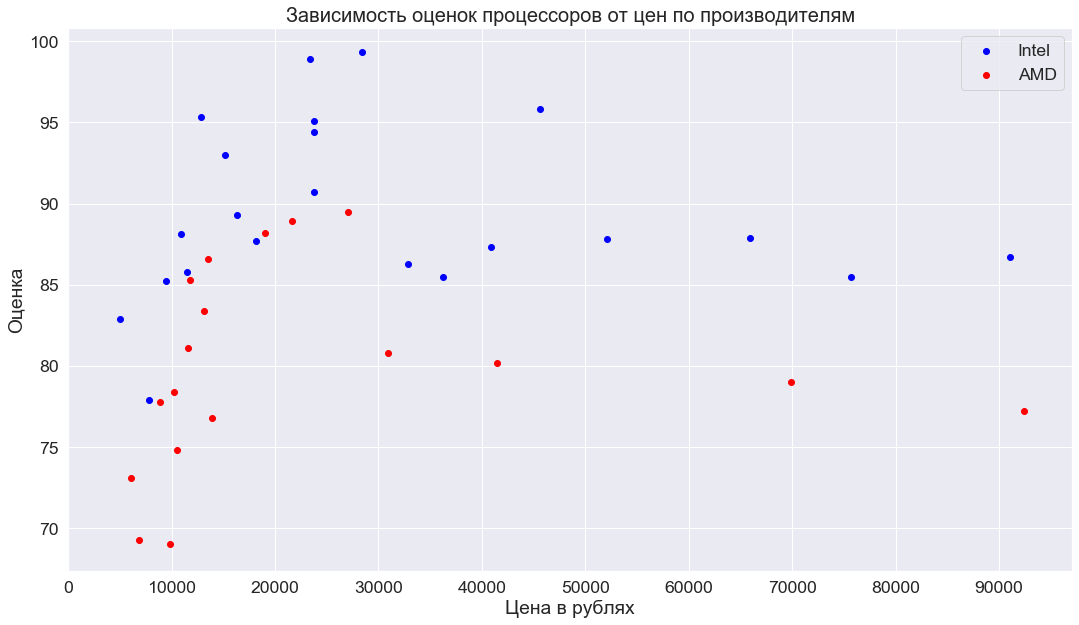

In [16]:
intel_data = cpu_data[cpu_data['manufacturer'] == 'Intel']
amd_data = cpu_data[cpu_data['manufacturer'] == 'AMD']
plt.figure(figsize=(18, 10))
plt.scatter(
    x=intel_data['price'],
    y=intel_data['effective_speed'],
    color='blue',
    label='Intel'
)
plt.scatter(
    x=amd_data['price'],
    y=amd_data['effective_speed'],
    color='red',
    label='AMD'
)
plt.xlabel('Цена в рублях')
plt.ylabel('Оценка')
plt.title('Зависимость оценок процессоров от цен по производителям', 
          fontsize=20)
plt.xticks(np.arange(0, 100000, 10000))
plt.legend()
plt.show()

К сожажелнию, видно, что AMD все же отстает от Intel:( Давайте посмотрим насколько примерно он отстает на каждом диапазоне цен (0-5000, 5000-15000, 15000-25000 итд)

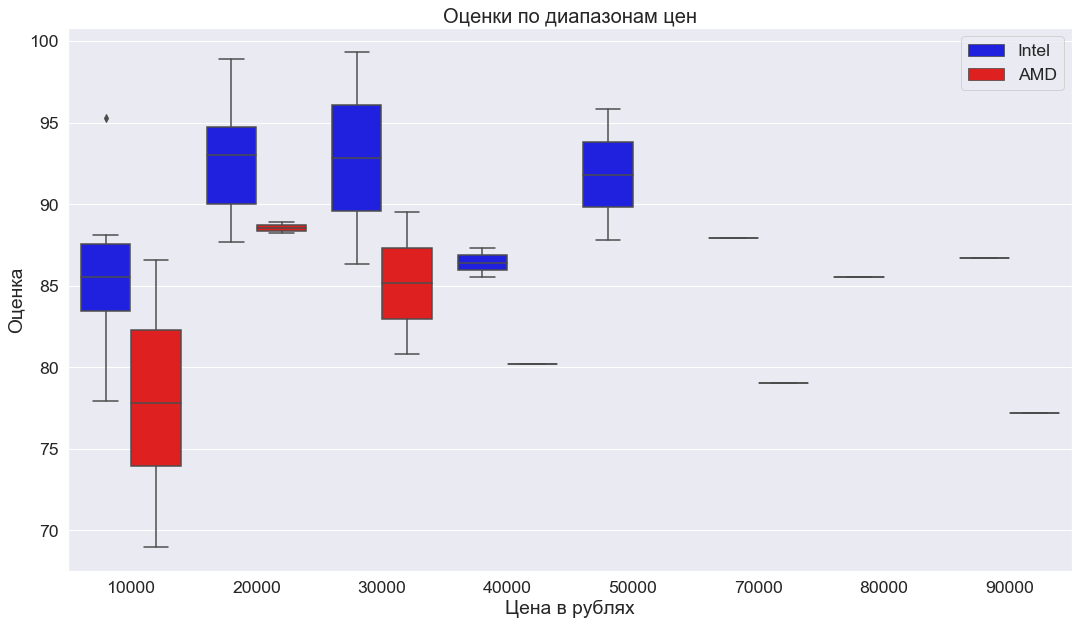

In [17]:
plt.figure(figsize=(18, 10))
sns.boxplot(
    x='price', 
    y='effective_speed',
    hue='manufacturer',
    data=cpu_data.round({'price': -4}),
    palette=['blue','red']
)
plt.xlabel('Цена в рублях')
plt.ylabel('Оценка')
plt.title('Оценки по диапазонам цен', 
          fontsize=20)
plt.legend()
plt.show()

Видим, что в среднем Ryzen достаточно сильно отстает от Core. Например, в диапазоне около 10к отставание на 7.5 баллов, 20к - на 6 баллов, 30к - на 7.5 баллов.
Но может это потому что AMD только недавно запустили на продажу Ryzen, и они по-тихоньку догоняют Intel? Давайте рассмотрим по отдельности процессоры выпуска 2018 и 2019 годов.

**2018 год:**

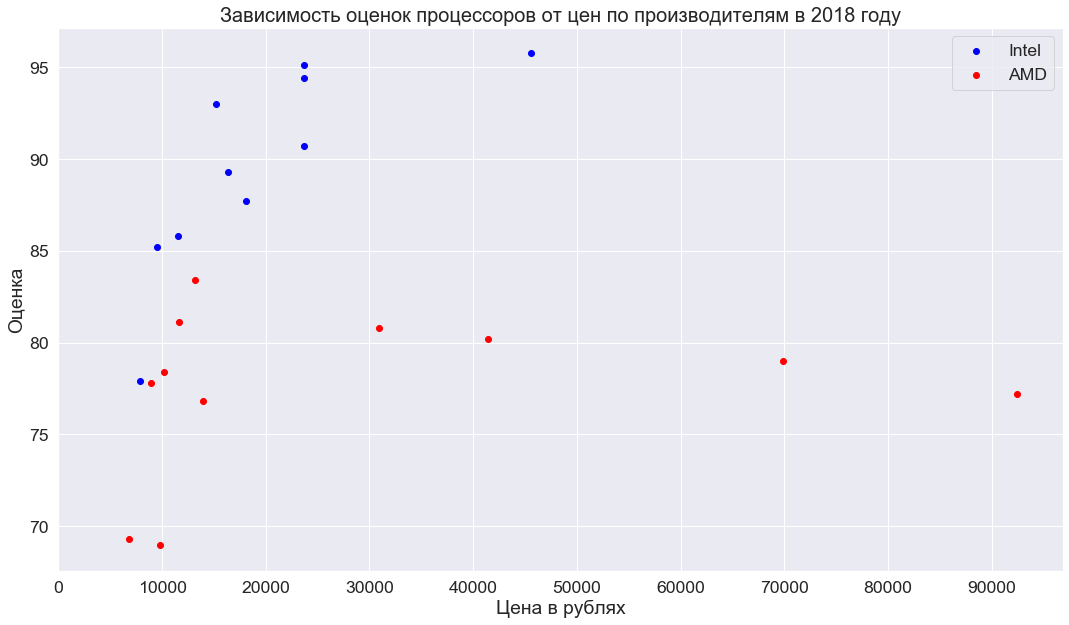

In [18]:
cpu_data_2018 = cpu_data[cpu_data['release_year'] == 2018]
intel_data = cpu_data_2018[cpu_data_2018['manufacturer'] == 'Intel']
amd_data = cpu_data_2018[cpu_data_2018['manufacturer'] == 'AMD']
plt.figure(figsize=(18, 10))
plt.scatter(
    x=intel_data['price'],
    y=intel_data['effective_speed'],
    color='blue',
    label='Intel'
)
plt.scatter(
    x=amd_data['price'],
    y=amd_data['effective_speed'],
    color='red',
    label='AMD'
)
plt.xlabel('Цена в рублях')
plt.ylabel('Оценка')
plt.title('Зависимость оценок процессоров от цен по производителям в 2018 году', 
          fontsize=20)
plt.xticks(np.arange(0, 100000, 10000))
plt.legend()
plt.show()

Intel был впереди. И можем заметить, что AMD не было процессоров ценой около 20к. Но зато они выпустили серию дорогих и мощных процессоров, ценой выше 30к. У Intel таких нет, или я их не нашел...

**2019 год:**

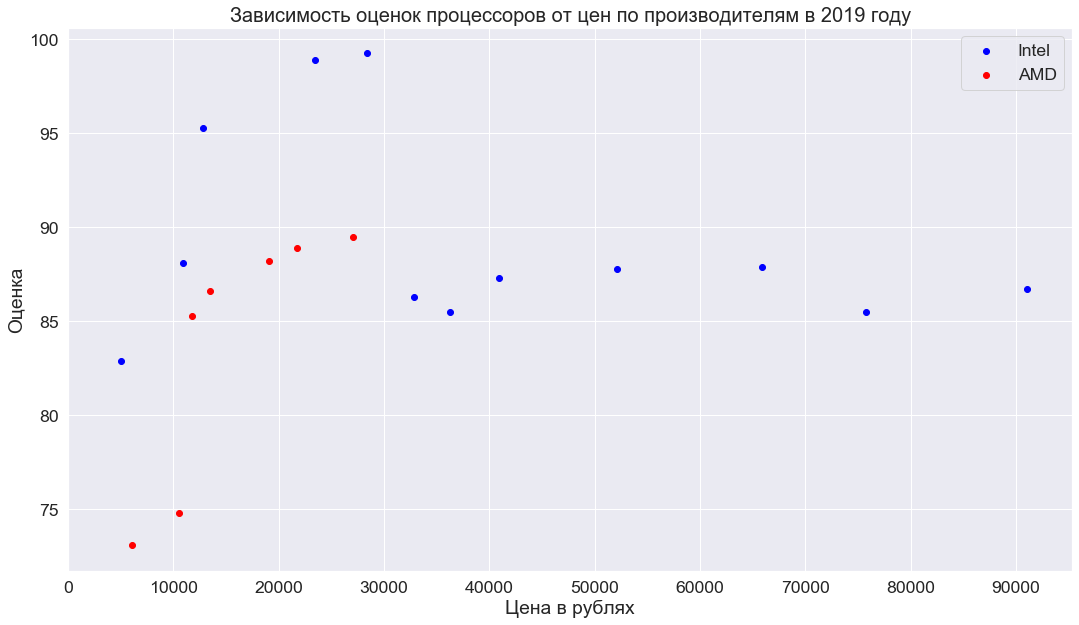

In [19]:
cpu_data_2019 = cpu_data[cpu_data['release_year'] == 2019]
intel_data = cpu_data_2019[cpu_data_2019['manufacturer'] == 'Intel']
amd_data = cpu_data_2019[cpu_data_2019['manufacturer'] == 'AMD']
plt.figure(figsize=(18, 10))
plt.scatter(
    x=intel_data['price'],
    y=intel_data['effective_speed'],
    color='blue',
    label='Intel'
)
plt.scatter(
    x=amd_data['price'],
    y=amd_data['effective_speed'],
    color='red',
    label='AMD'
)
plt.xlabel('Цена в рублях')
plt.ylabel('Оценка')
plt.title('Зависимость оценок процессоров от цен по производителям в 2019 году', 
          fontsize=20)
plt.xticks(np.arange(0, 100000, 10000))
plt.legend()
plt.show()

Опять AMD позади. И теперь же можем увидеть, что Intel выпустил дорогие и мощные процессоры. И они мощнее AMD-шных. Это мы можем заметить по самому первому графику выше.

Теперь попробуем увидеть, растет ли производительность Ryzen и догоняют ли они Intel. Для этого мы снова построим boxplot-ы, но теперь два: для 2018 и 2019 годов.

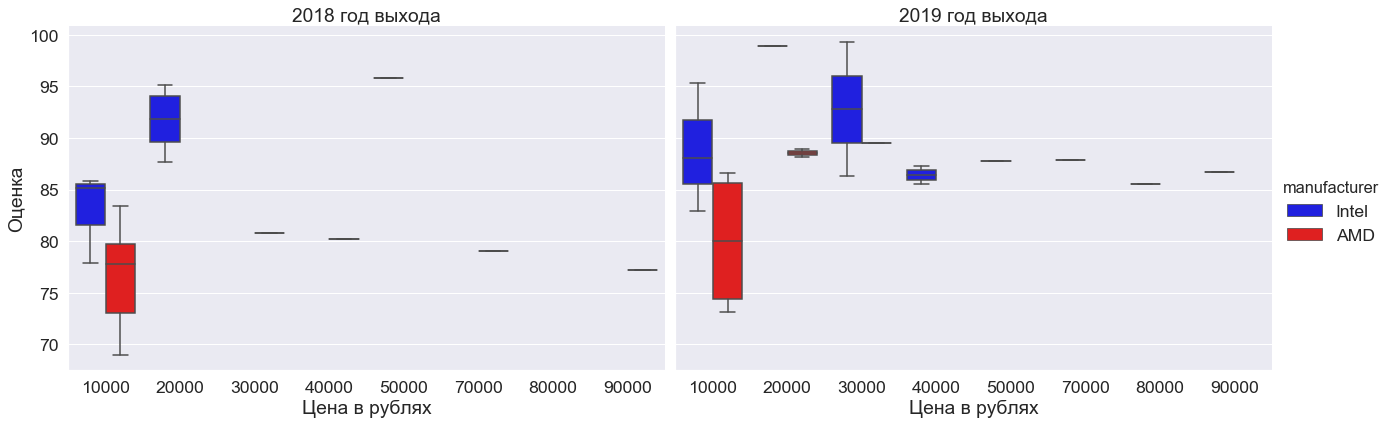

In [20]:
g = sns.catplot(
    x='price', 
    y='effective_speed',
    hue='manufacturer',
    col='release_year',
    data=cpu_data.round({'price': -4}),
    palette=['blue','red'],
    kind='box',
    height=6, aspect=1.5
)
g.set_axis_labels('Цена в рублях', 'Оценка')
g.set_titles('{col_name} год выхода')

Видим, что в диапазоне около 10к Intel как был лучшим, так и им остался, не смотря на то, что средняя цоенка AMD увеличилась. В диапазоне около 20к AMD даже не смог догнать Intel-ские процессоры прошлогоднего выпуска. Ну а на других диапазонах Intel так явно сохраняет лидерство.  

**Общий вывод:** если сравнивать компании по оценкам из https://www.userbenchmark.com/, то Intel сохраняет свое лидерство во всех ценовых диапазонах, не смотря на то, что AMD тоже улучшает свои процессоры.

---
### Задача 4.

Некоторые студенты второго курса ФИВТ понадеявшись на отмену учета посещения занятий по курсу "Введение в анализ данных" решили дудосить гугл-опросники. Команда "Физтех.Статистики" без особых проблем смогла разделить результаты опроса на спамовые и настоящие, а также установить круг подозреваемых. Теперь это предлагается сделать вам как начинающим аналитикам.

Вам выдаются результаты нескольких опросов. 
1. Необходимо для каждой строки понять, является ли результат спамовым или настоящим. Результаты анализа необходимо прислать на почту вместе с решением.
2. Какими общими характеристиками обладают спамовые записи? Как часто они происходят?

Для решения задачи я взял таблицу с оценками и достал оттуда все имена учеников. И буду считать, что человек из этого списка, заполнивший форму, "настоящий".  

In [21]:
student_list = pd.read_excel('Список учеников по АД.xlsx')
student_list.head()

,Ученик
0,Айгожиев Бахтияр
1,Булыгин Артем Константинович
2,Кашин Кирилл Олегович
3,Кухтенков Алексей Сергеевич
4,Максименко Александр Евгеньевич


In [22]:
# Убираю отчества, так как форме нужно было писать только имя и фамилию
student_list['Ученик'] = student_list['Ученик'].apply(lambda x: x.split(' ')[0]
                                                      + ' ' + x.split(' ')[1])
student_list.head()

,Ученик
0,Айгожиев Бахтияр
1,Булыгин Артем
2,Кашин Кирилл
3,Кухтенков Алексей
4,Максименко Александр


Разберемся с формой 5 марта.

In [23]:
data = pd.read_excel('Лекция 5 марта.xlsx')
data.head()

,Отметка времени,Группа,Фамилия Имя
0,2020-03-05 18:07:33.041,Другая,Иванин Евгений
1,2020-03-05 19:17:02.696,825,Чернов Андрей
2,2020-03-05 19:17:03.071,811,Чуров Дима
3,2020-03-05 19:17:03.192,824,Жуков Павел
4,2020-03-05 19:17:04.713,813,Мальцев Дмитрий


In [24]:
data = pd.merge(data, student_list, how='left',
                left_on='Фамилия Имя', right_on='Ученик')

In [25]:
data.rename(columns={'Ученик':'Настоящий?'}, inplace=True)
data['Настоящий?'] = data['Настоящий?'].notna()
data.head()

,Отметка времени,Группа,Фамилия Имя,Настоящий?
0,2020-03-05 18:07:33.041,Другая,Иванин Евгений,False
1,2020-03-05 19:17:02.696,825,Чернов Андрей,True
2,2020-03-05 19:17:03.071,811,Чуров Дима,False
3,2020-03-05 19:17:03.192,824,Жуков Павел,True
4,2020-03-05 19:17:04.713,813,Мальцев Дмитрий,True


In [26]:
data.to_excel('Исправленное 5 марта.xlsx', index=False)

Если посмотреть на таблицу, то видно, что фейковые фамилии и имена делались комбинациями половинок имен и фамилии других учеников. И делались они примерно 5 записей в секунду.

Разберемся с формой 30 апреля.

In [27]:
data = pd.read_excel('Лекция 30 апреля.xlsx')
data.head()

,Отметка времени,ФИО,Группа
0,2020-04-30 19:18:38.415,Астафуров Евгений Олегович,812
1,2020-04-30 19:18:41.251,Севец Владислав Сергеевич,Б05-825
2,2020-04-30 19:18:41.327,Голяр Димитрис Георгиевич,Б05-826
3,2020-04-30 19:18:42.195,ГУСЕВ РОМАН ЕВГЕНЬЕВИЧ,823
4,2020-04-30 19:18:42.683,Богданов Сергей Владимирович,Б05-821


In [28]:
student_list = pd.read_excel('Список учеников по АД.xlsx')
student_list.head()

,Ученик
0,Айгожиев Бахтияр
1,Булыгин Артем Константинович
2,Кашин Кирилл Олегович
3,Кухтенков Алексей Сергеевич
4,Максименко Александр Евгеньевич


In [29]:
# переводим все в lowercase
student_list['Ученик'] = student_list['Ученик'].apply(lambda x: x.lower())
data['ФИО'] = data['ФИО'].apply(lambda x: str(x).lower())

In [30]:
data = pd.merge(data, student_list, how='left',
                left_on='ФИО', right_on='Ученик')
data.rename(columns={'Ученик':'Настоящий?'}, inplace=True)
data['Настоящий?'] = data['Настоящий?'].notna()
data.head()

,Отметка времени,ФИО,Группа,Настоящий?
0,2020-04-30 19:18:38.415,астафуров евгений олегович,812,True
1,2020-04-30 19:18:41.251,севец владислав сергеевич,Б05-825,True
2,2020-04-30 19:18:41.327,голяр димитрис георгиевич,Б05-826,True
3,2020-04-30 19:18:42.195,гусев роман евгеньевич,823,True
4,2020-04-30 19:18:42.683,богданов сергей владимирович,Б05-821,True


In [31]:
data.to_excel('Исправленное 30 апреля.xlsx', index=False)

Здесь, если посмотреть на таблицу, то там комбинируются фамилии и имена учеников и еще есть много Редкозубовых. Периодичность спамов примерно такая же: 5 записей в секунду.